In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
california_housing = fetch_california_housing(as_frame=True)

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
california_df = california_housing.frame

In [8]:
california_df.shape

(20640, 9)

In [9]:
california_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [10]:
# check missing values
california_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
# check duplicate values
california_df[california_df.duplicated(keep=False)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


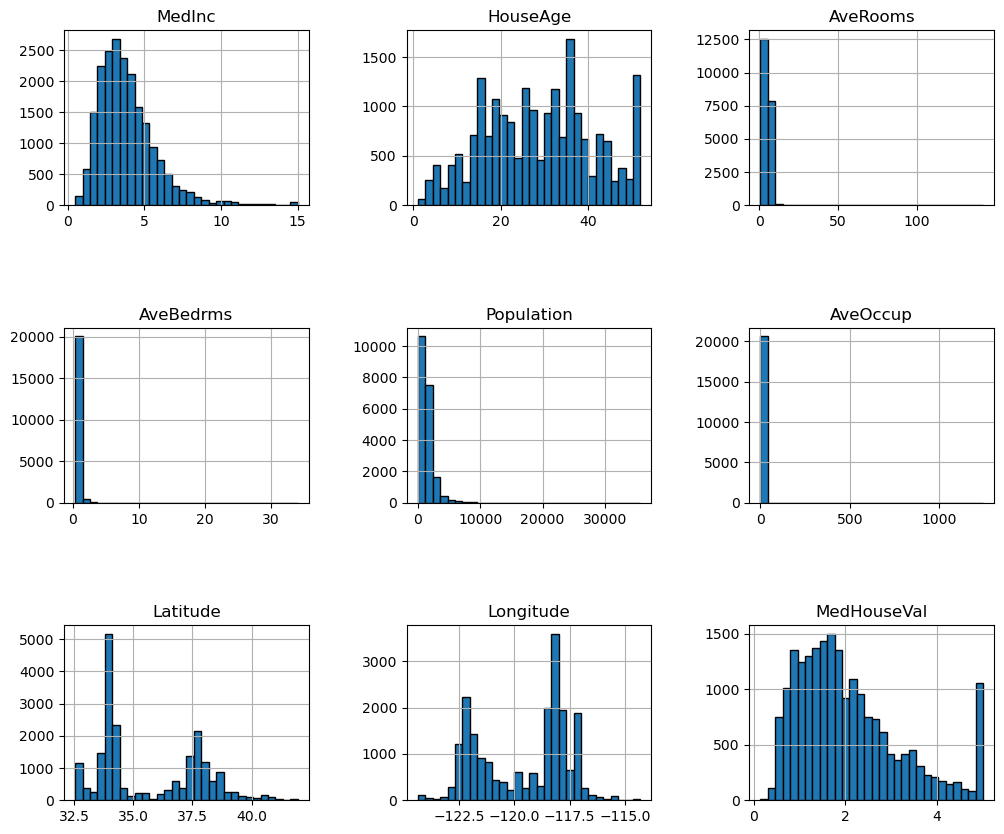

In [12]:
#Feature distribution using histograms

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

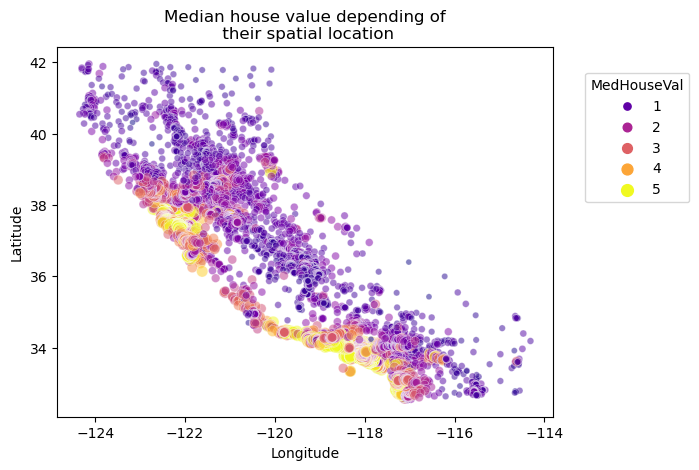

In [13]:
#Median house value depending on spatial location

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="plasma",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [28]:
# Load the California housing dataset
data = fetch_california_housing()

# 'MedHouseVal' is the target variable
X = california_df.drop("MedHouseVal", axis=1)  
y = california_df["MedHouseVal"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=10, random_state=99, shuffle=True)   #kfold cross validation object with 10 splits

In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Function to evaluate and display model performance and return results
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return mse, rmse, r2

# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": (PolynomialFeatures(degree=2), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1), 
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

}

# Evaluate all models and store their results
results={}
for name, model in models.items():
    if name == "Polynomial Regression":
        poly_features, poly_model = model
        X_train_poly = poly_features.fit_transform(X_train_scaled)
        X_test_poly = poly_features.transform(X_test_scaled)
        results[name] = evaluate_model(poly_model, X_train_poly, y_train, X_test_poly, y_test, name)
    else:
        results[name] = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name)
        

Linear Regression - MSE: 0.5559, RMSE: 0.7456, R2: 0.5758
Polynomial Regression - MSE: 0.4643, RMSE: 0.6814, R2: 0.6457
Ridge Regression - MSE: 0.5559, RMSE: 0.7456, R2: 0.5758
Lasso Regression - MSE: 0.6796, RMSE: 0.8244, R2: 0.4814
ElasticNet Regression - MSE: 0.6359, RMSE: 0.7974, R2: 0.5148
Decision Tree Regression - MSE: 0.4940, RMSE: 0.7028, R2: 0.6230
Random Forest Regression - MSE: 0.2556, RMSE: 0.5055, R2: 0.8050
Gradient Boosting Regression - MSE: 0.2940, RMSE: 0.5422, R2: 0.7756
SVR - MSE: 0.3570, RMSE: 0.5975, R2: 0.7276
XGBRegressor - MSE: 0.2226, RMSE: 0.4718, R2: 0.8301


In [31]:
# Determine the best model based on MSE, RMSE, and R2
best_model = None
best_mse = float('inf')
best_rmse = float('inf')
best_r2 = float('-inf')

for name, metrics in results.items():
    mse, rmse, r2 = metrics
    # Check for the model with the lowest MSE and RMSE, and the highest R2
    if mse < best_mse and rmse < best_rmse and r2 > best_r2:
        best_mse = mse
        best_rmse = rmse
        best_r2 = r2
        best_model = name

print(f"The best model is {best_model} with MSE of {best_mse:.4f}, RMSE of {best_rmse:.4f}, and R2 of {best_r2:.4f}.")

The best model is XGBRegressor with MSE of 0.2226, RMSE of 0.4718, and R2 of 0.8301.


MSE: 0.5559
RMSE: 0.7456
R-squared: 0.5758
Predicted Median House Value: $123258.28


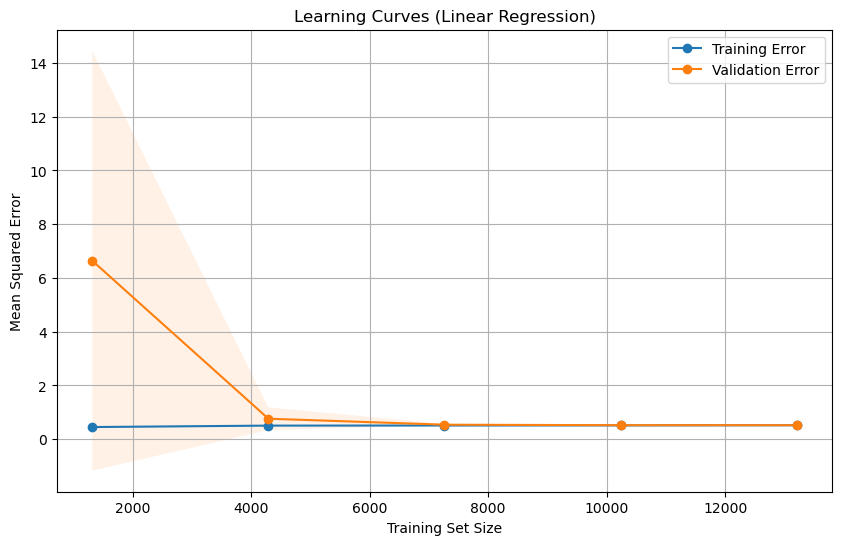

In [32]:
#Linear regression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test_scaled)

# Calculate MSE and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Example: Predicting for a new input 
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # example features
new_data_scaled = scaler.transform(new_data)  # scale the new data

# Predicting the MedHouseVal
predicted_value = lr_model.predict(new_data_scaled)
print(f"Predicted Median House Value: ${predicted_value[0] * 100000:.2f}")  

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and validation scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Linear Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best polynomial degree: {'poly__degree': 1}
Best MSE score: 0.5192652011433678
MSE: 0.5559
RMSE: 0.7456
R-squared: 0.5758
Predicted Median House Value: $123258.28


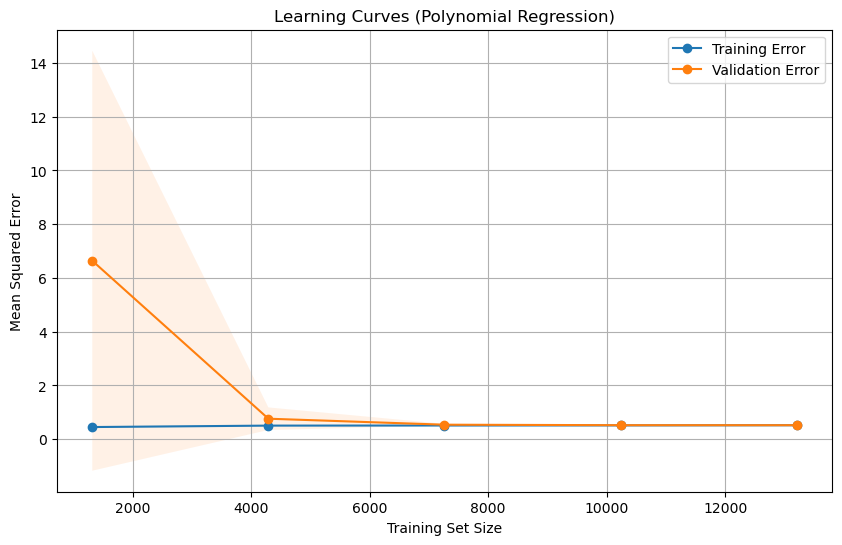

In [42]:
#Polynomial witgh gridsearchcv

# Create a pipeline that combines polynomial features and a linear regression model
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Define the parameter grid to search
param_grid = {
    'poly__degree': [1, 2, 3, 4]  # Degrees of the polynomial to test
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best polynomial degree:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

#  Predicting for a new input 
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predicted_value = best_model.predict(new_data_scaled)
print(f"Predicted Median House Value: ${predicted_value[0] * 100000:.2f}") 

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Polynomial Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Best alpha: {'alpha': 0.1}
Best MSE score: 0.5192651994657134
Ridge Regression MSE: 0.5559
Ridge Regression RMSE: 0.7456
Ridge Regression R-squared: 0.5758
Predicted Median House Value using Ridge Regression: $123263.21


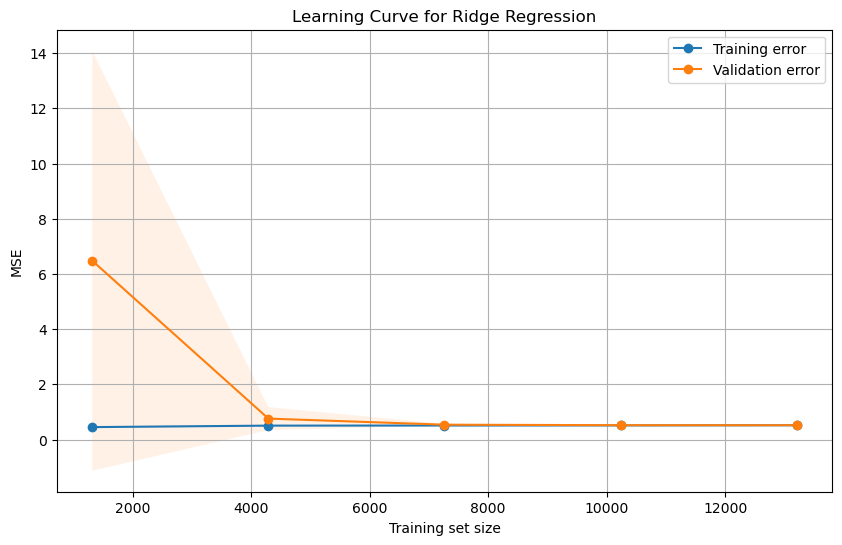

In [45]:
#Ridge with gridsearchcv 

# Setup GridSearchCV to find the best hyperparameters
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best alpha:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_ridge_model = grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")

# Predicting for new input
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predicted_value_ridge = best_ridge_model.predict(new_data_scaled)
print(f"Predicted Median House Value using Ridge Regression: ${predicted_value_ridge[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.title("Learning Curve for Ridge Regression")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Best alpha: {'alpha': 0.001}
Best MSE score: 0.5192468796642637
Lasso Regression MSE: 0.5545
Lasso Regression RMSE: 0.7446
Lasso Regression R-squared: 0.5769
Predicted Median House Value using Lasso Regression: $127109.19


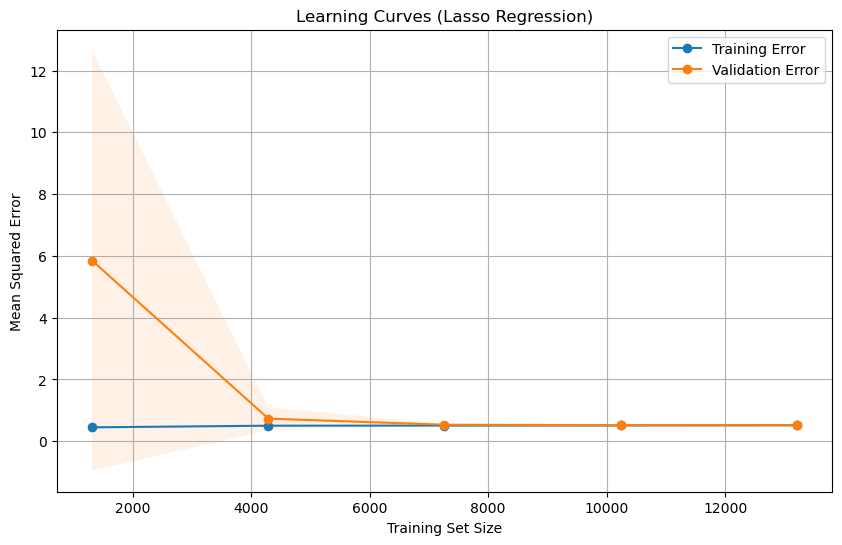

[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.1s
[CV] END .....................................poly__degree=4; total time=   1.8s


In [46]:
#Lasso with gridsearch cv

# Setup GridSearchCV to find the best hyperparameters
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Different values of alpha to test
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best alpha:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_lasso_model = grid_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")
print(f"Lasso Regression R-squared: {r2_lasso:.4f}")

# Example new data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)  # Scale the new data

# Predicting the MedHouseVal
predicted_value_lasso = best_lasso_model.predict(new_data_scaled)
print(f"Predicted Median House Value using Lasso Regression: ${predicted_value_lasso[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Lasso Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best MSE score: 0.5213285298565676
ElasticNet Regression MSE: 0.5519
ElasticNet Regression RMSE: 0.7429
ElasticNet Regression R-squared: 0.5788
Predicted Median House Value using ElasticNet Regression: $134424.23


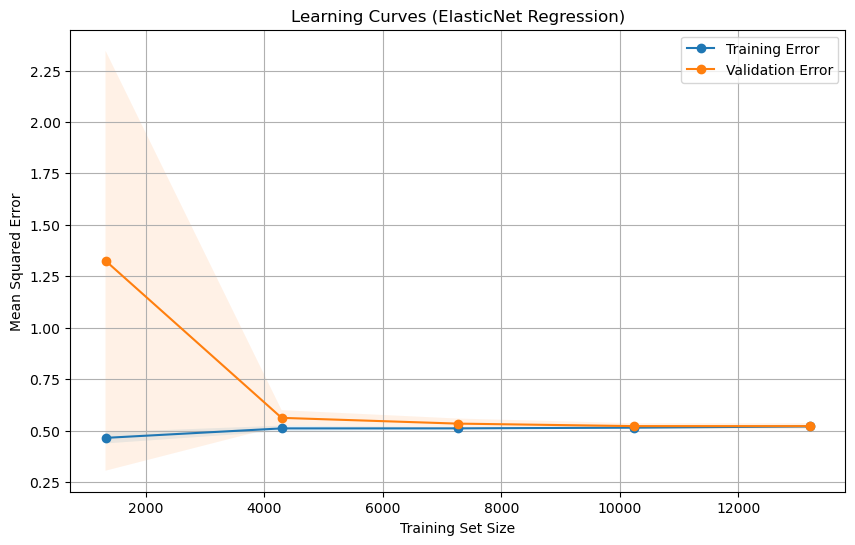

In [47]:
#Elasticnet with gridsearch

# Setup GridSearchCV to find the best hyperparameters
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic_model = ElasticNet()
grid_search = GridSearchCV(elastic_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_elastic_model = grid_search.best_estimator_
y_pred_elastic = best_elastic_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Regression MSE: {mse_elastic:.4f}")
print(f"ElasticNet Regression RMSE: {rmse_elastic:.4f}")
print(f"ElasticNet Regression R-squared: {r2_elastic:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predicted_value_elastic = best_elastic_model.predict(new_data_scaled)
print(f"Predicted Median House Value using ElasticNet Regression: ${predicted_value_elastic[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_elastic_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (ElasticNet Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best MSE score: 0.37502762833565495
Decision Tree Regression MSE: 0.3635
Decision Tree Regression RMSE: 0.6029
Decision Tree Regression R-squared: 0.7226
Predicted Median House Value using Decision Tree Regression: $189744.44


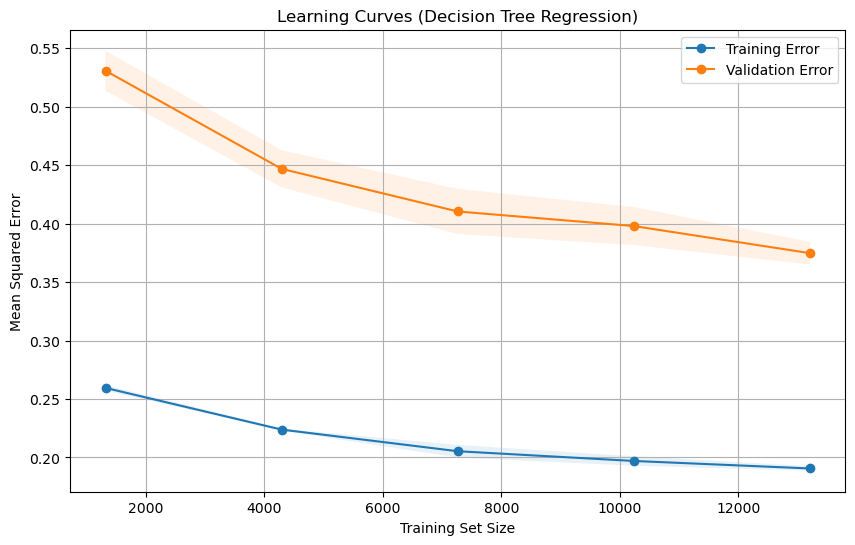

In [48]:
#Decisiontree with gridsearch

# Setup GridSearchCV to find the best hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression MSE: {mse:.4f}")
print(f"Decision Tree Regression RMSE: {rmse:.4f}")
print(f"Decision Tree Regression R-squared: {r2:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)
predicted_value = best_dt_model.predict(new_data_scaled)
print(f"Predicted Median House Value using Decision Tree Regression: ${predicted_value[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_dt_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Decision Tree Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE score: 0.2594035775741559
MSE: 0.2537
RMSE: 0.5037
R-squared: 0.8064
Predicted Median House Value using Random Forest Regression: $238119.34


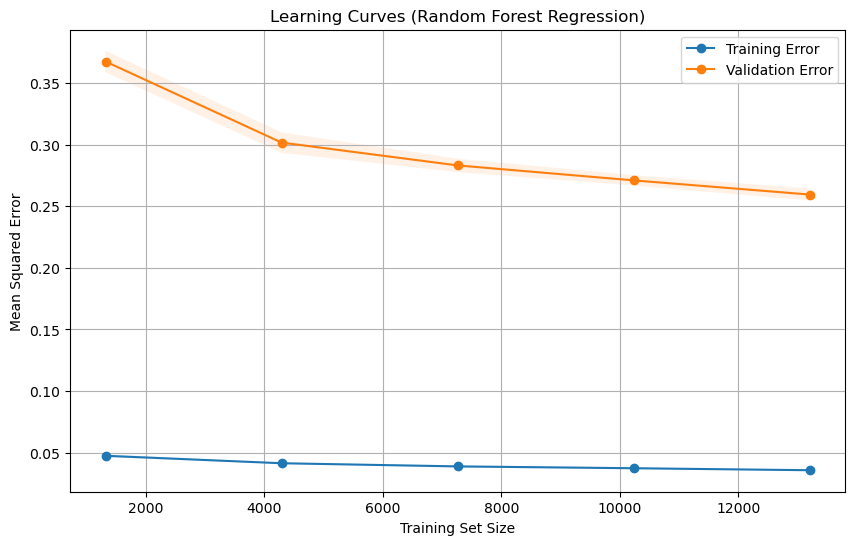

In [55]:
#Randomforest with gridsearch

# Setup GridSearchCV to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)
predicted_value = best_rf_model.predict(new_data_scaled)
print(f"Predicted Median House Value using Random Forest Regression: ${predicted_value[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Random Forest Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best MSE score: 0.22002701688837228
MSE: 0.2170
RMSE: 0.4659
R-squared: 0.8344
Predicted Median House Value using Gradient Boosting Regression: $392894.95


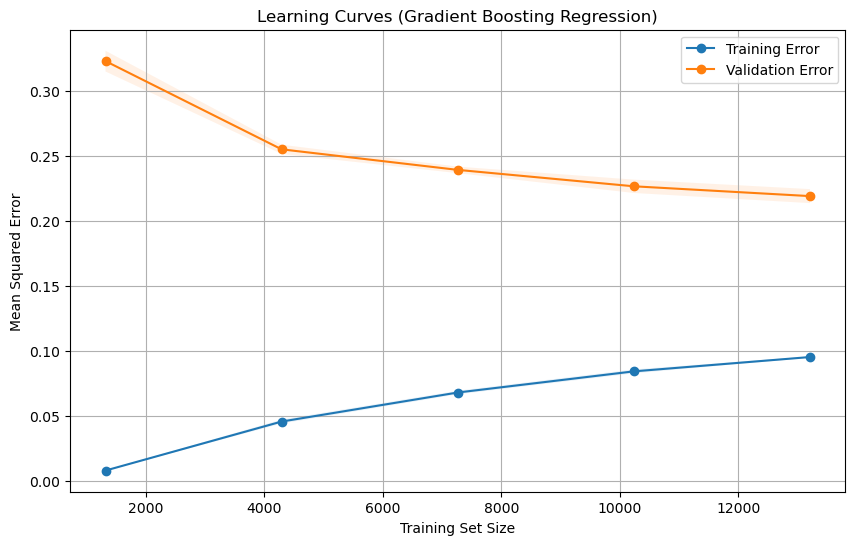

In [54]:
#Gradient boost with gridsearch

# Setup GridSearchCV to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)
predicted_value = best_gb_model.predict(new_data_scaled)
print(f"Predicted Median House Value using Gradient Boosting Regression: ${predicted_value[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Gradient Boosting Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}
Best MSE score: 0.3230370573668751
MSE: 0.3237
RMSE: 0.5690
R-squared: 0.7530
Predicted Median House Value using SVR: $387876.42


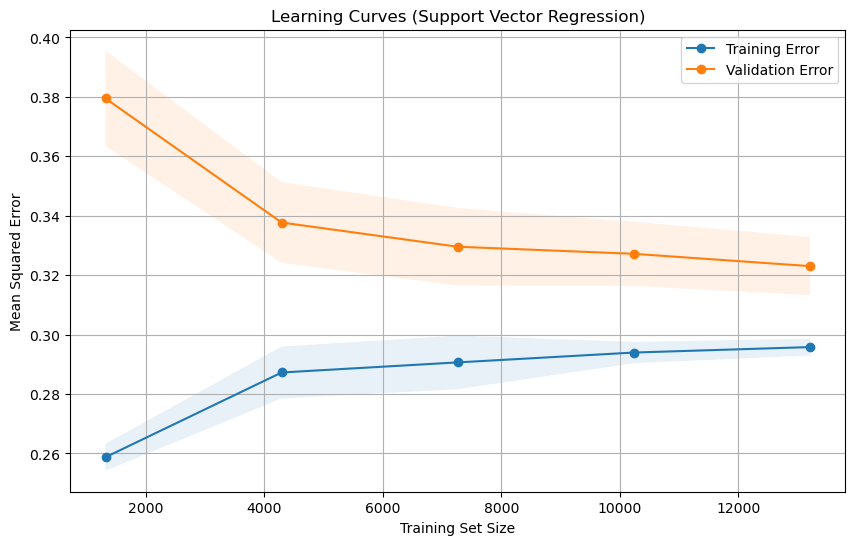

In [56]:
#SVR with gridsearch

# Setup GridSearchCV to find the best hyperparameters for SVR
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}
svr_model = SVR()
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])  # Example features
new_data_scaled = scaler.transform(new_data)
predicted_value = best_svr_model.predict(new_data_scaled)
print(f"Predicted Median House Value using SVR: ${predicted_value[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Support Vector Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best MSE score: 0.20983828308414648
XGBRegressor MSE: 0.2011
XGBRegressor RMSE: 0.4484
XGBRegressor R-squared: 0.8466
Predicted Median House Value using XGBRegressor: $361200.67


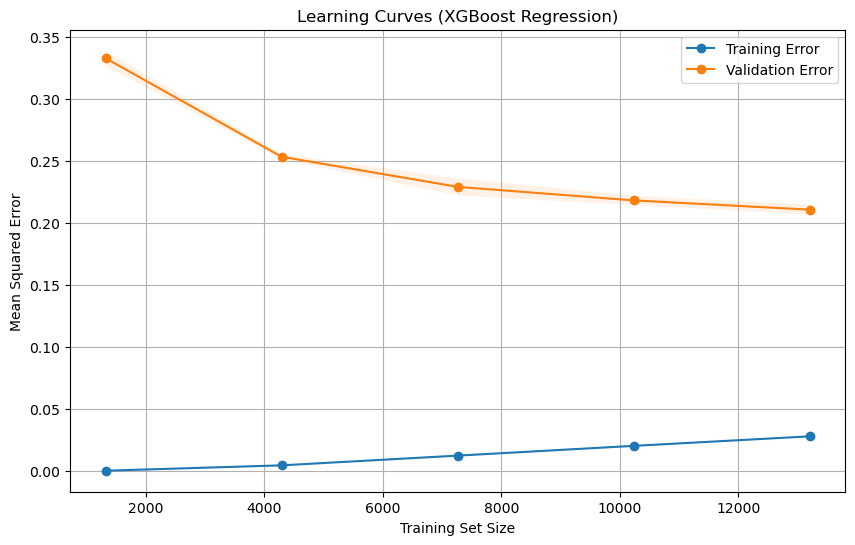

In [57]:
#XGB with gridsearch

# Setup GridSearchCV to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1]
}
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score:", -grid_search.best_score_)

# Use the best estimator to make predictions
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBRegressor MSE: {mse_xgb:.4f}")
print(f"XGBRegressor RMSE: {rmse_xgb:.4f}")
print(f"XGBRegressor R-squared: {r2_xgb:.4f}")

# Predicting for new input data
new_data = np.array([[4.1518, 21.0, 8.3252, 0.146591, 322.0, 2.555556, 37.88, -122.23]])
new_data_scaled = scaler.transform(new_data)
predicted_value_xgb = best_xgb_model.predict(new_data_scaled)
print(f"Predicted Median House Value using XGBRegressor: ${predicted_value_xgb[0] * 100000:.2f}")

# Plotting learning curves
train_sizes, train_scores, valid_scores = learning_curve(best_xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error")
plt.plot(train_sizes, valid_mean, 'o-', label="Validation Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (XGBoost Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()